In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale



In [44]:
df=pd.read_csv("C:/Users/win10/Desktop/DATA SCIENCE/ExcelR/Assignment Given (Untouched)/5)PCA/Assignment Given/wine.csv")
# df.describe()
# df.dtypes

df_new=scale(df.iloc[:,3:16])

<IPython.core.display.Javascript object>

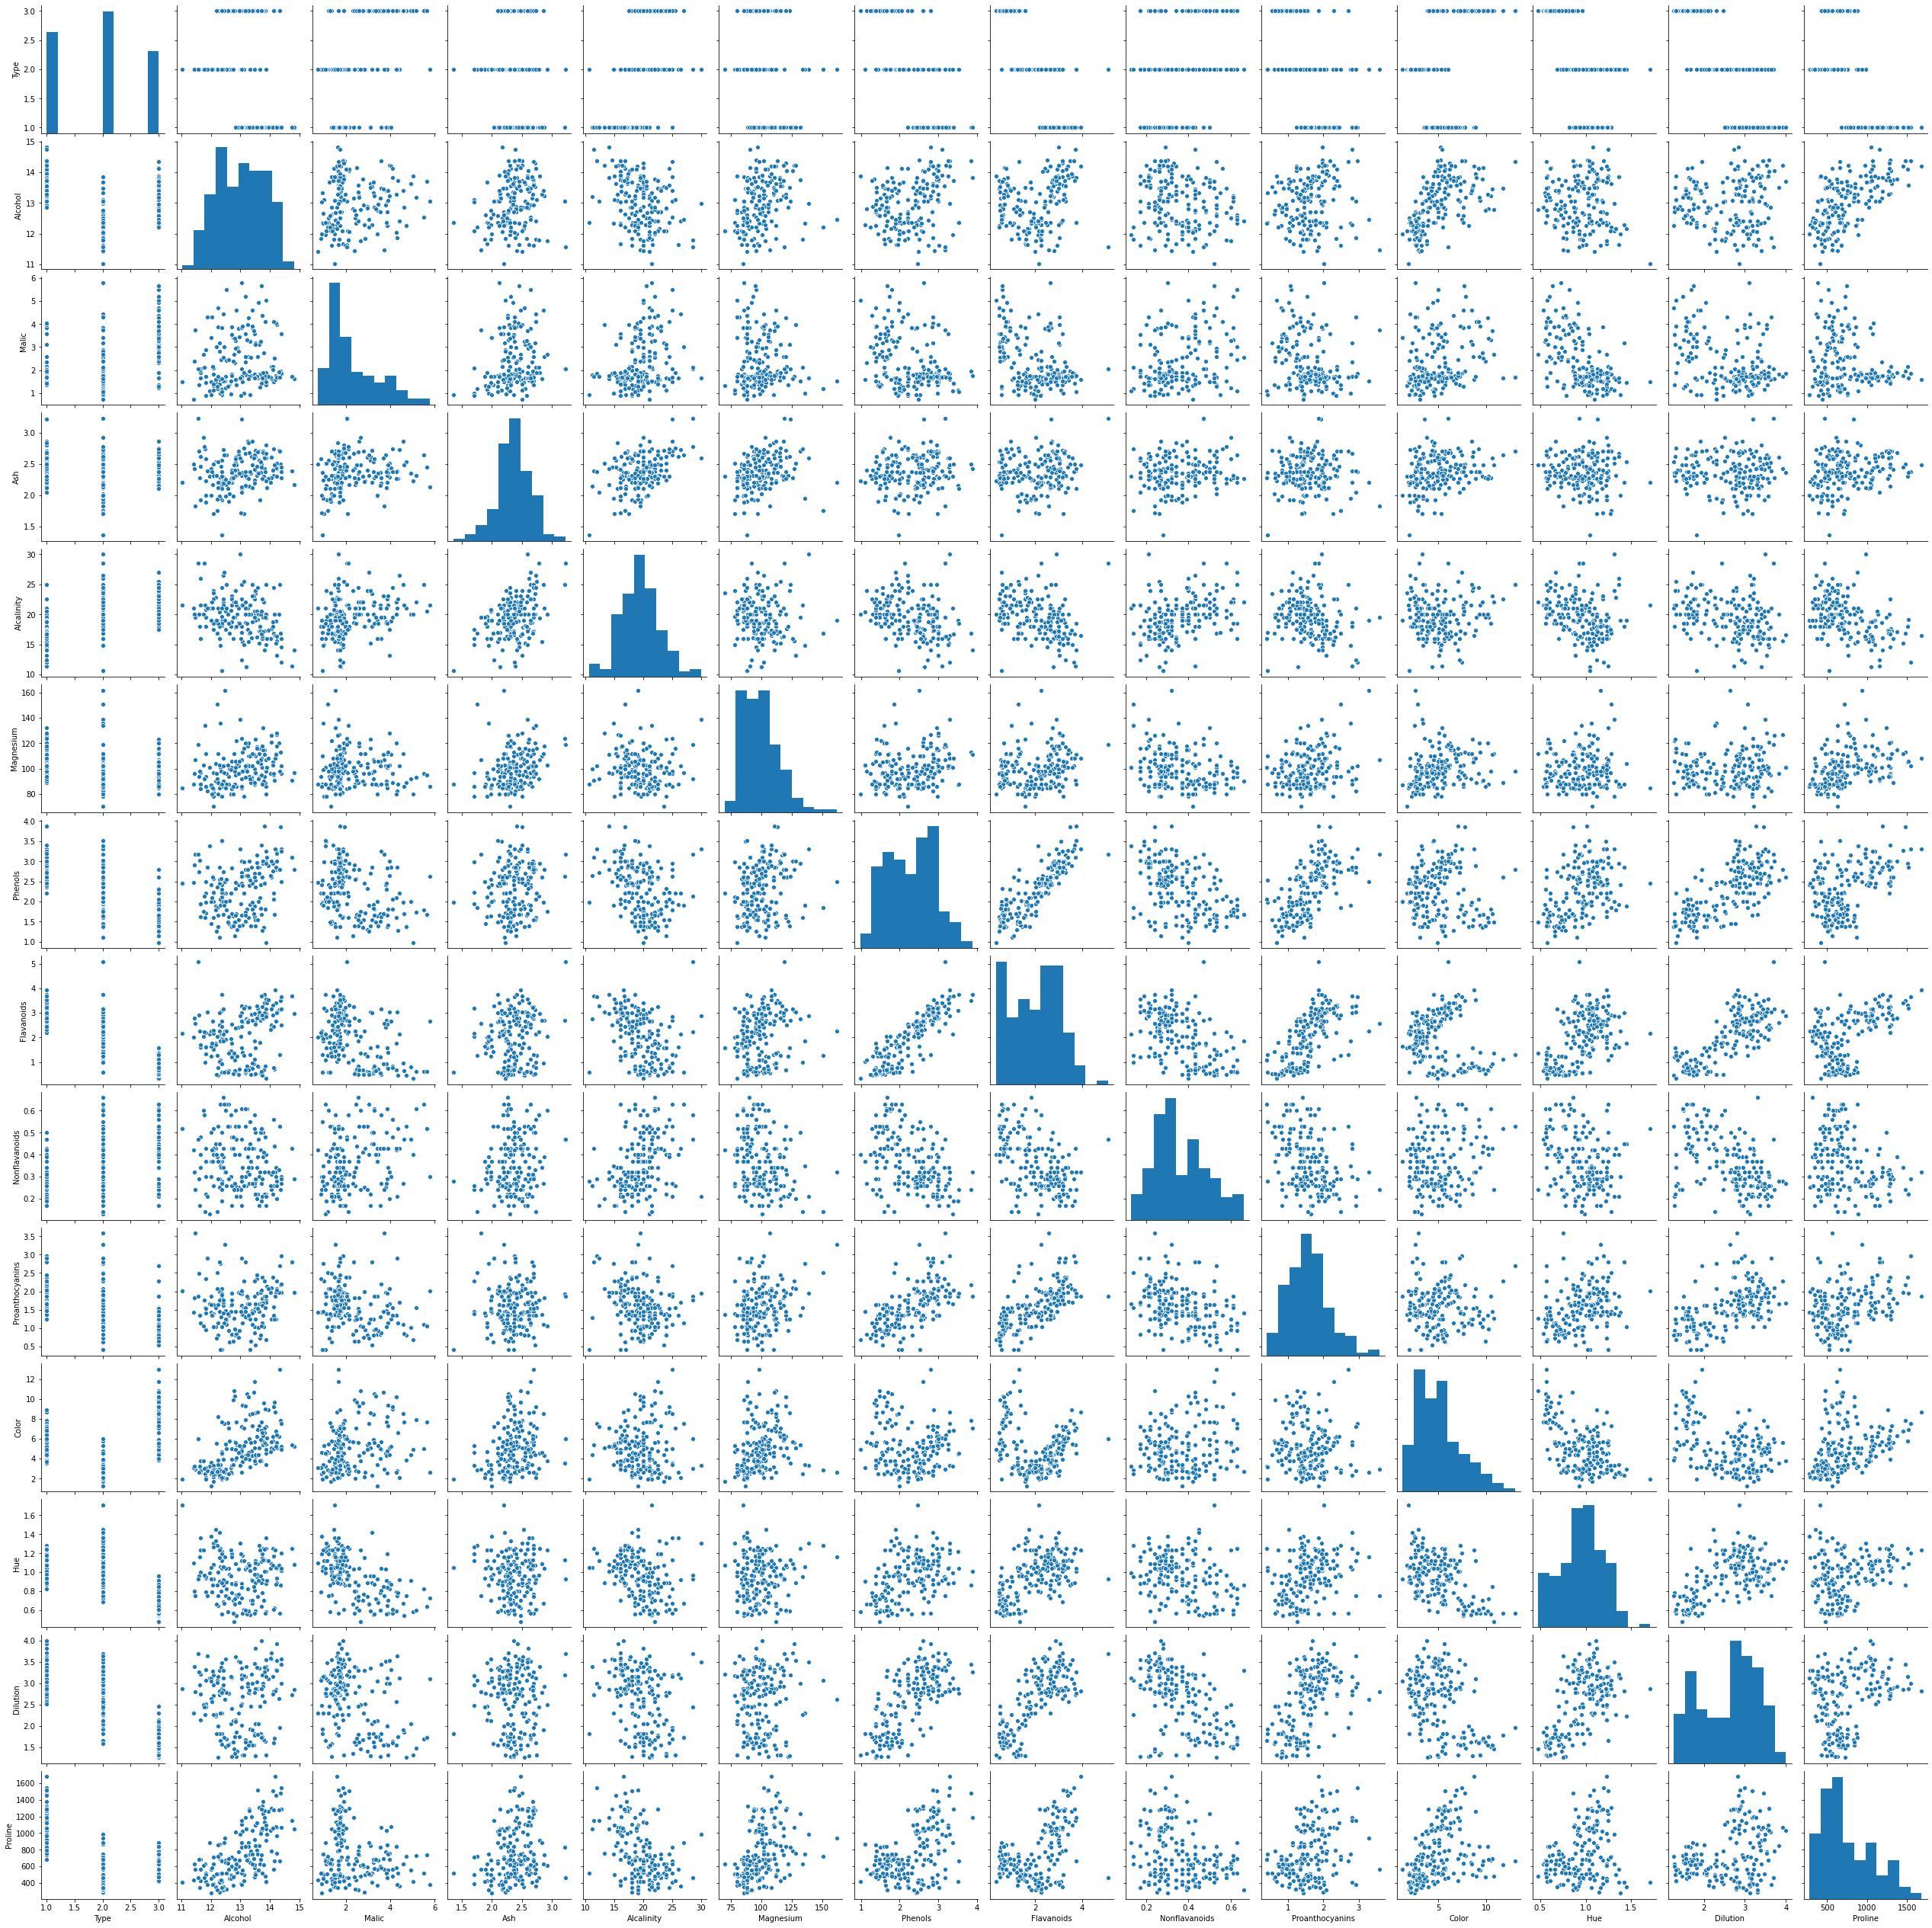

In [45]:
sns.pairplot(df)

In [30]:
#Applying PCA
pca=PCA(n_components=9)
pca_values=pca.fit_transform(df_new)

#The amount of varience that each PCA explains
var=pca.explained_variance_ratio_
var

array([0.39771759, 0.17747211, 0.1239707 , 0.07452128, 0.07052543,
       0.05126081, 0.03127104, 0.02607825, 0.0211404 ])

In [31]:
#Cumulative varience
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([39.77, 57.52, 69.92, 77.37, 84.42, 89.55, 92.68, 95.29, 97.4 ])

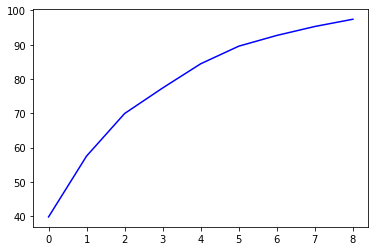

In [32]:
#Variance plot for PCA Components
plt.plot(var1,color='blue')




In [33]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


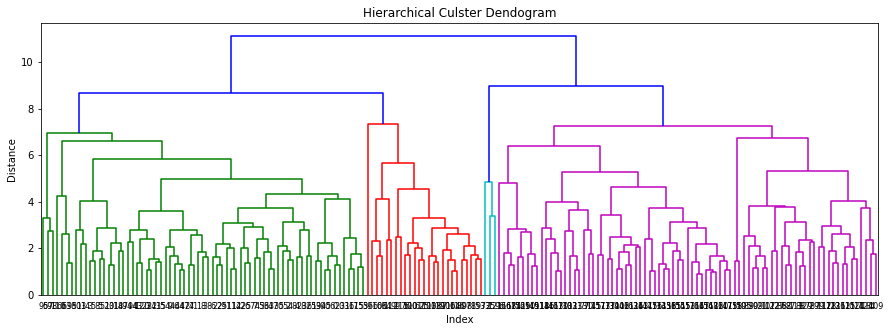

In [34]:
########To apply Hierarchical clustering ###################

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch


z=linkage(df_new,method='complete',metric='euclidean')

plt.figure(figsize=(15,5));
plt.title("Hierarchical Culster Dendogram");
plt.xlabel("Index");
plt.ylabel('Distance');
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=8);



In [35]:
h_clust=AgglomerativeClustering(n_clusters=10,linkage='complete', affinity='euclidean').fit(df_new)
h_clust.labels_
df["clust"]=h_clust.labels_


In [36]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [37]:
df=df.iloc[:,[14,0,1,2,3,4,5,6,7,8,9,10,11,12,13]]


In [38]:
df.head()

,clust,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


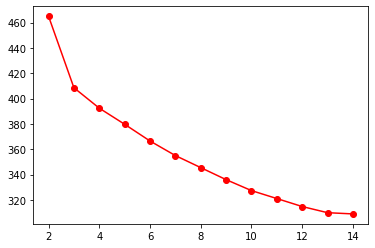

In [39]:
##################To apply Kmeans Clustering ################

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

#To plot elbow curve and screw plot

k=list(range(2,15))
k
TWSS=[]
for i in k:
    kmeans=KMeans(n_clusters=i).fit(df_new)
    WSS=[]
    for j in range(i):
        WSS.append(sum(cdist(df_new[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_new.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

plt.plot(k,TWSS,'ro-')


In [40]:
#KMeans model building:

kmeans=KMeans(n_clusters=12)
kmeans.fit(df_new)
kmeans.labels_

df['clust_Kmeans']=kmeans.labels_


In [41]:
df.head()

,clust,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust_Kmeans
0,0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,7
1,0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,0,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,7
3,0,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,7
4,0,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,6


In [42]:
df=df.iloc[:,[15,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]]

In [43]:
df.head()

,clust_Kmeans,clust,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,7,0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,7,0,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,7,0,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,6,0,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
